In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the data
feature_path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\feature_VBL-VA001.csv'
label_path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\label_VBL-VA001.csv'

In [3]:
features = pd.read_csv(feature_path, header=None)
labels = pd.read_csv(label_path, header=None)


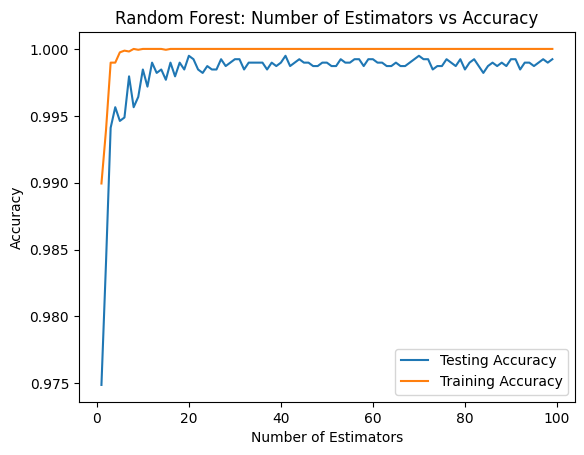

In [7]:
# Setup arrays to store training and test accuracies
estimators = np.arange(1, 100)
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))

for i, n in enumerate(estimators):
    # Setup a Random Forest classifier with n estimators
    rf = RandomForestClassifier(n_estimators=n)
    # Fit the model
    rf.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i] = rf.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i] = rf.score(X_test, y_test)

# Generate plot
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest: Number of Estimators vs Accuracy')
plt.show()


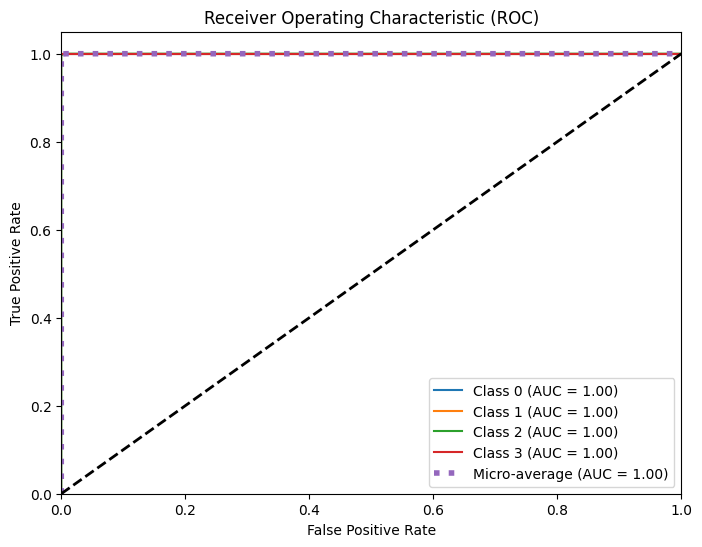

In [9]:
path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\label_VBL-VA001.csv'
y = pd.read_csv(path, header=None)

# Convert y to 1D array
y = y.values.ravel()
# Convert labels to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute predicted probabilities for each class
y_prob = rf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Compute ROC curve and AUC for micro-average
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_bin, y_prob, average='micro')

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = {0:.2f})'.format(roc_auc_micro), linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [4]:
# Convert labels to 1D array
labels = np.ravel(labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy:  0.999230966418867
Precision:  0.9992542272652756
Recall:  0.9992133435115892
F1-score:  0.9992331377425793
